## **Retroalimentación**

1. **Analisis exploratorio 5/10**

1. En el analsis categorico se define 3 "Neighborhood", "BsmtFinType1", "GarageFinish"
2. Se elige una característica numérica, pero no queda claro si se han realizado pruebas adicionales, como el análisis Q-Q o similares, para identificar si otras características numéricas podrían ser más adecuadas. -3

2. **Splines  23/30**

1. El análisis realizado se centra exclusivamente en la característica 'BsmtUnfSF'. -3

2. El método de validación y las pruebas aplicadas son adecuados y bien ejecutados. Sin embargo, se recomienda extender la exploración a más de una característica para validar si esto mejora la calidad y utilidad de la información obtenida y ademas compara entre los modelos  y  generar conclusiones   de la evaluacón -3

3. No realzian modificaciones de nodos  en difernetes  ubicaciones -1


3. **kernel 36/50**

1. Utilizan KernelRidge.
2. No toman en cuenta las variables categóricas. -4 puntos
3. No presentan conclusiones del modelo. Mencionan los parámetros alpha y gamma, pero no exploran las características, ni el tipo de kernel utilizado. -8 puntos
4. Solo usa una metrica  y no define la validación  -2


4. **Comparación y Evaluación 5/10**:

1. No se realiza una comparación exhaustiva y detallada entre los modelos.







# Tarea 2 Analisis Avanzado de Datos

Juan Jose Caballero y Camilo Silva

Cosas iniciales:

In [ ]:
import pandas as pd
import math

from google.colab import drive
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeavePOut
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/Colab Notebooks/commaseparatedvalues/train.csv"

path = "train.csv"
df = pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Punto 1

In [ ]:
columns_to_drop = ['Id', "Alley"]
df.drop(columns=columns_to_drop, inplace=True)

A continuación vamos a hacer la exploración de los datos



*   Hay columnas donde Nan es que la casa tiene 0 de una característica determinada, pero en el dataset los representan como valores Nan, por ejemplo en LotFrontage, reemplazaremos esos Nan por 0s



In [ ]:
indicesColumnas = []
a = (df.isnull().sum())
count=0
for i in a:
  if i!=0:
    print ("columna: ", count, df.dtypes[count], i, df.columns[count])
    indicesColumnas.append(count)
  count=count+1

columna:  2 float64 259 LotFrontage
columna:  23 object 8 MasVnrType
columna:  24 float64 8 MasVnrArea
columna:  28 object 37 BsmtQual
columna:  29 object 37 BsmtCond
columna:  30 object 38 BsmtExposure
columna:  31 object 37 BsmtFinType1
columna:  33 object 38 BsmtFinType2
columna:  40 object 1 Electrical
columna:  55 object 690 FireplaceQu
columna:  56 object 81 GarageType
columna:  57 float64 81 GarageYrBlt
columna:  58 object 81 GarageFinish
columna:  61 object 81 GarageQual
columna:  62 object 81 GarageCond
columna:  70 object 1453 PoolQC
columna:  71 object 1179 Fence
columna:  72 object 1406 MiscFeature


Realicemos una prueba ANOVA a las variables categóricas para ver si las variables son relevantes, o no, en caso de ser relevantes se procederá dependiendo si podemos hacer una codificación ordinal, o si tenemos que hacer Dummy encoding

Para la selección de variables categoricas, vamos primero a descartar las variables que no tengan diferencias significativas en sus categorias, tomaremos las variables cuyo p valor sea menor a 0.01

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
count= 0
categorical_columns = df.select_dtypes(exclude=["int64","float64"])
categoriasImportantes = []
for i in categorical_columns:

  categoryGroups = [group[1]['SalePrice'] for group in df.groupby(i)]

  f_statistic, p_value = f_oneway(*categoryGroups)

  alpha = 0.01
  if p_value < alpha:
      print("Rechazar la hipotesis nula, hay diferencias significativas",  i, df[i].dtypes)
      categoriasImportantes.append(i)
  else:
      print("No se rechaza la hipotesis nula, no hay diferencias significativas.",  i, df[i].dtypes)
  count = count+1


Rechazar la hipotesis nula, hay diferencias significativas MSZoning object
No se rechaza la hipotesis nula, no hay diferencias significativas. Street object
Rechazar la hipotesis nula, hay diferencias significativas LotShape object
Rechazar la hipotesis nula, hay diferencias significativas LandContour object
No se rechaza la hipotesis nula, no hay diferencias significativas. Utilities object
Rechazar la hipotesis nula, hay diferencias significativas LotConfig object
No se rechaza la hipotesis nula, no hay diferencias significativas. LandSlope object
Rechazar la hipotesis nula, hay diferencias significativas Neighborhood object
Rechazar la hipotesis nula, hay diferencias significativas Condition1 object
No se rechaza la hipotesis nula, no hay diferencias significativas. Condition2 object
Rechazar la hipotesis nula, hay diferencias significativas BldgType object
Rechazar la hipotesis nula, hay diferencias significativas HouseStyle object
Rechazar la hipotesis nula, hay diferencias signif

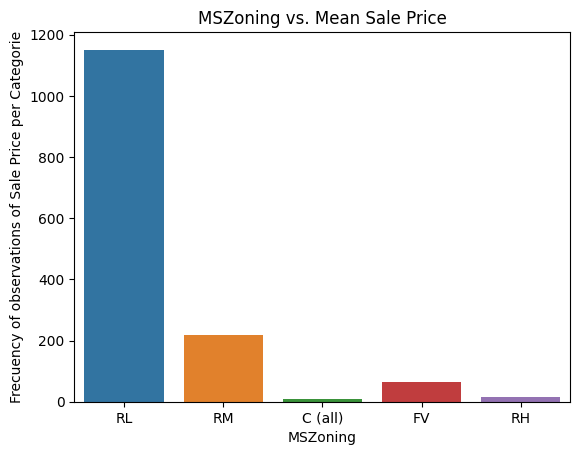

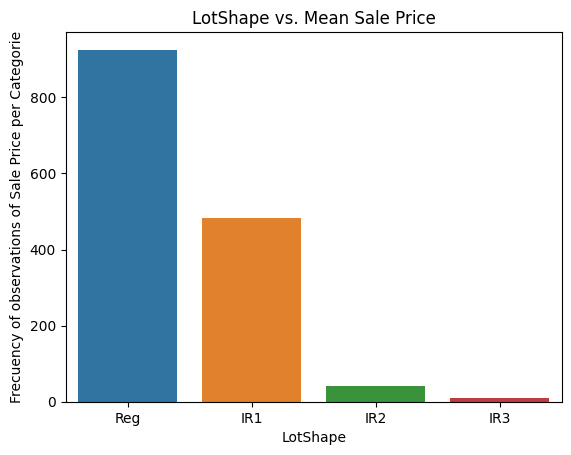

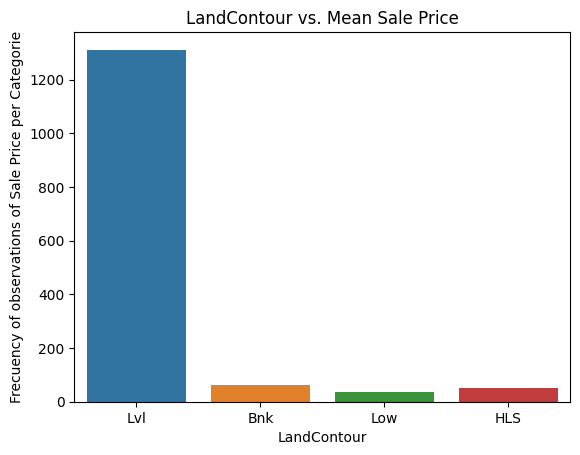

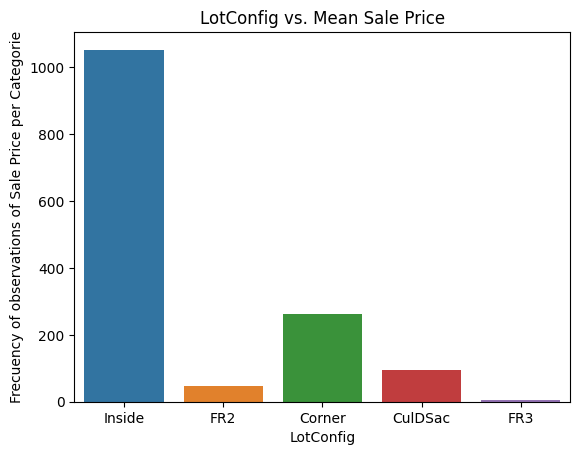

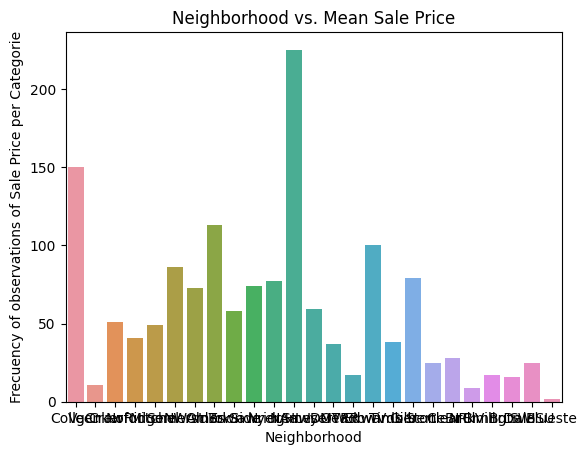

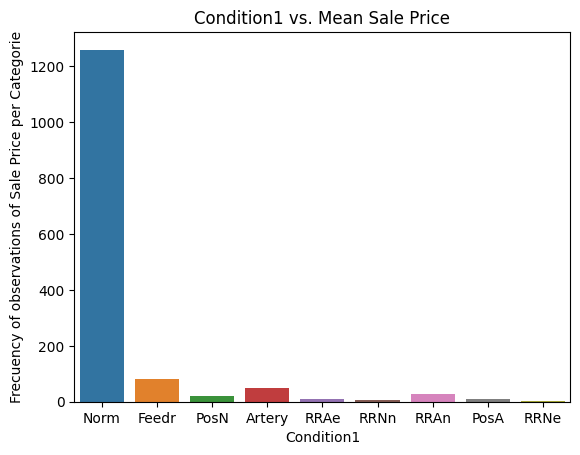

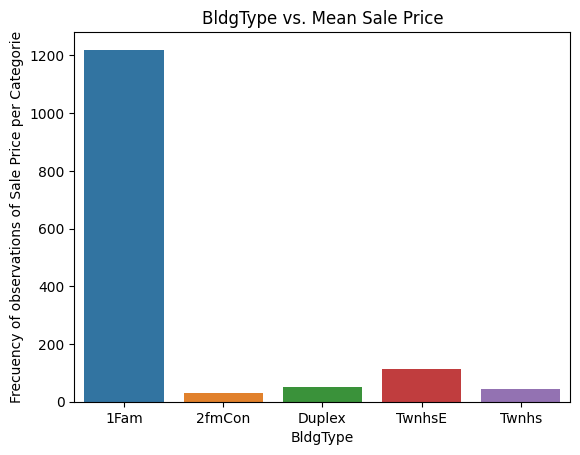

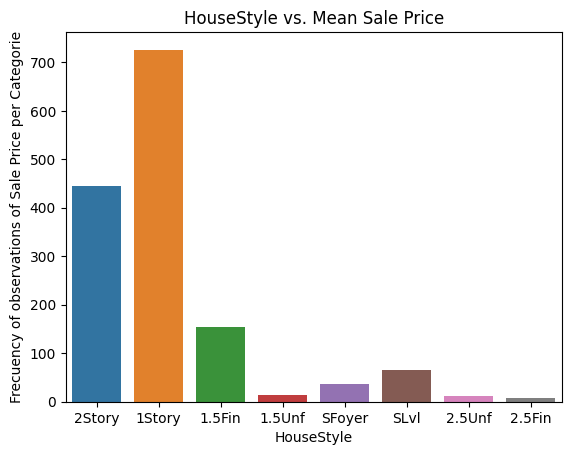

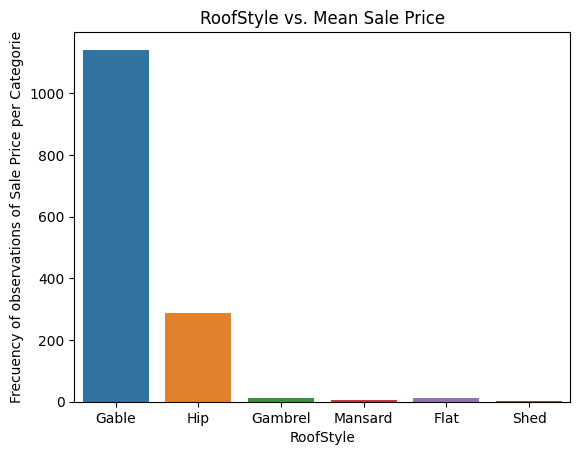

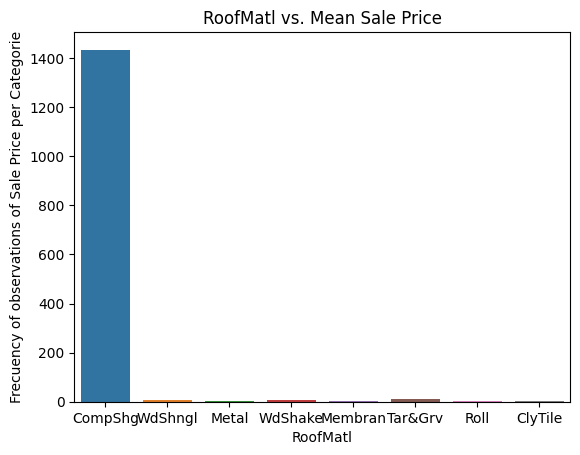

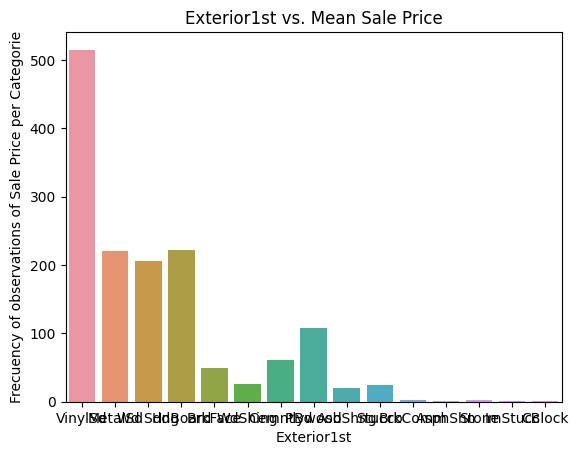

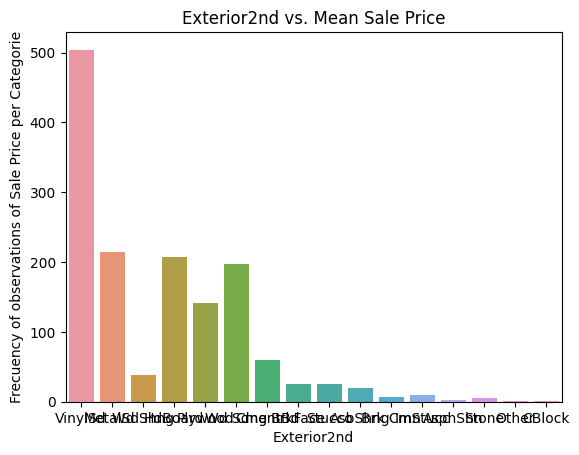

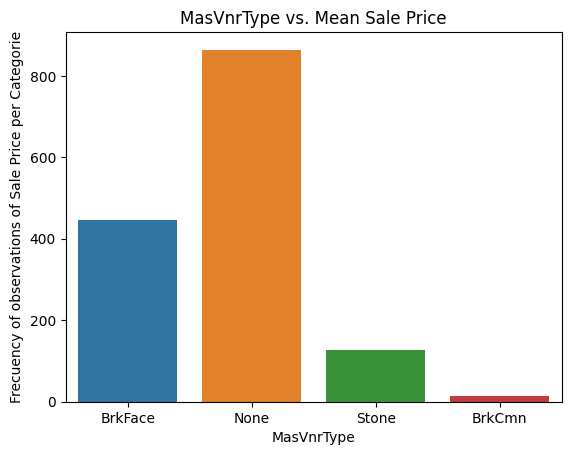

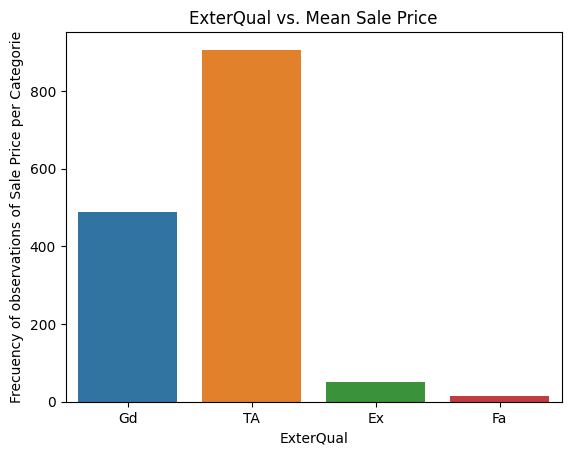

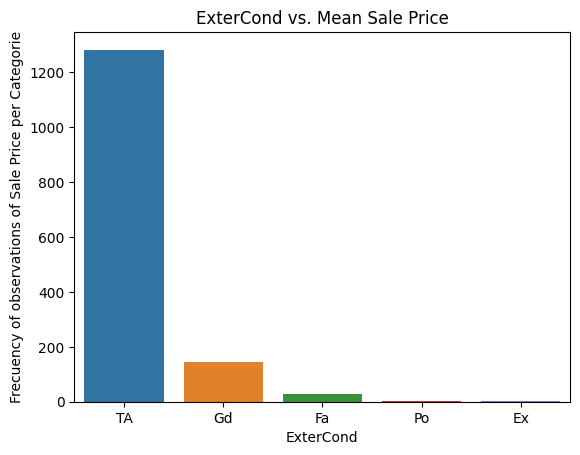

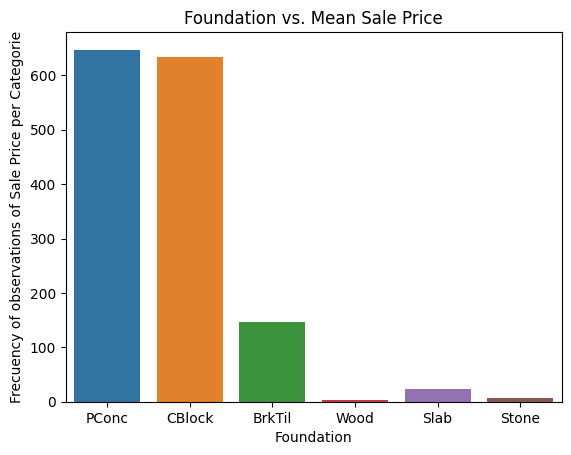

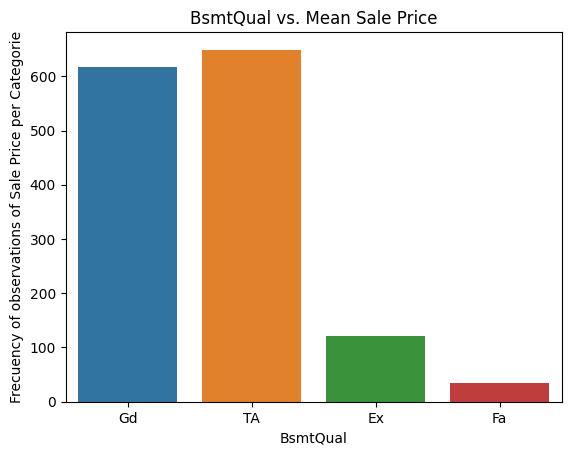

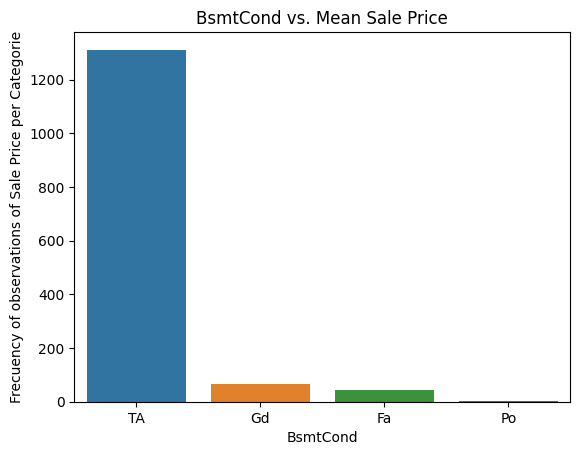

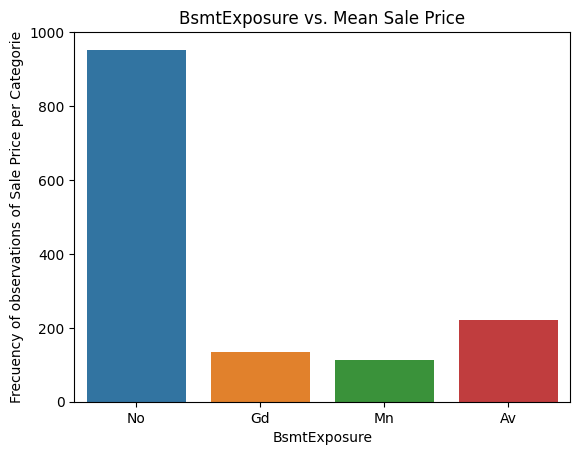

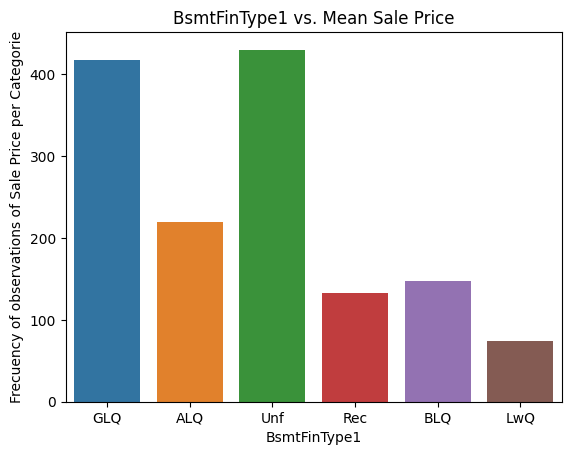

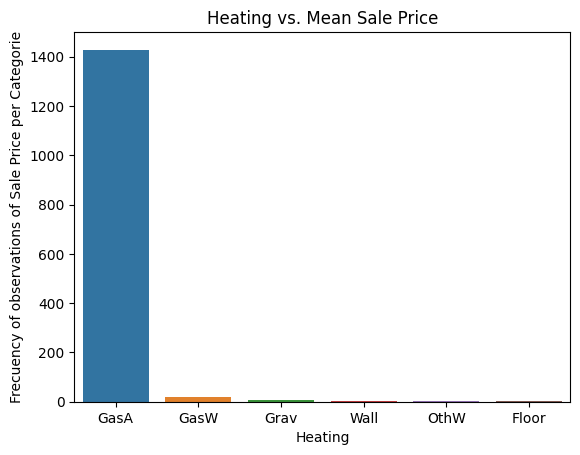

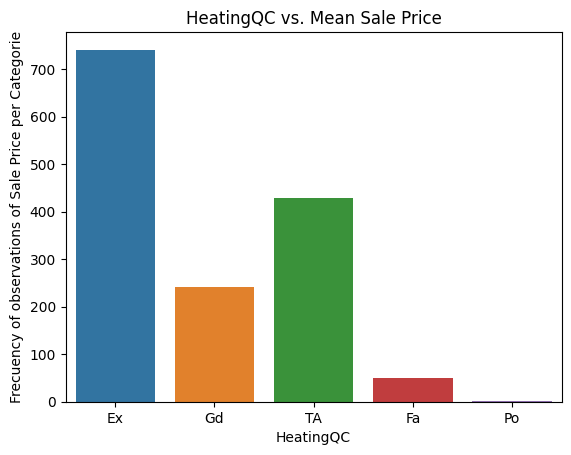

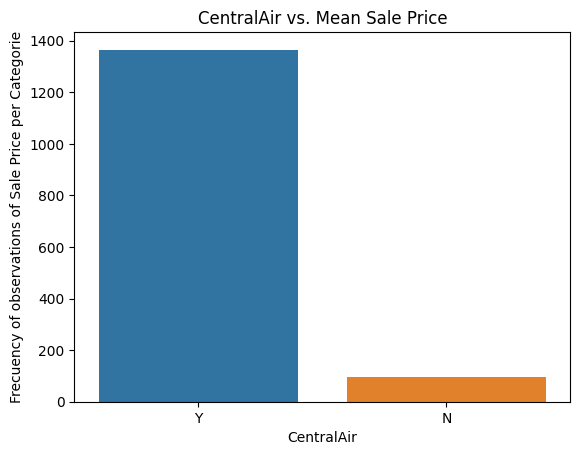

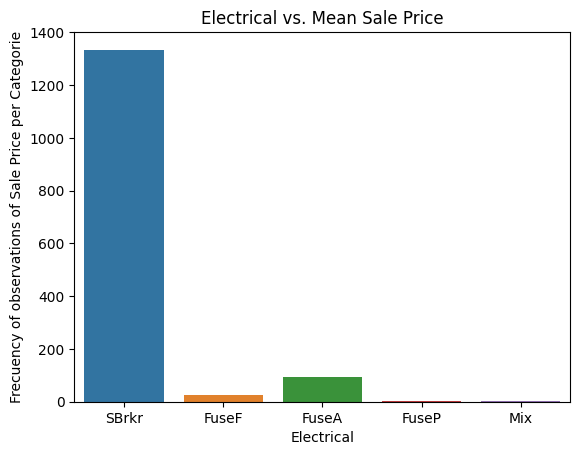

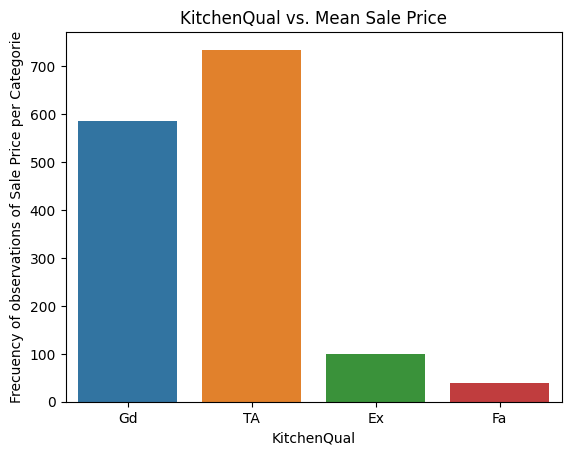

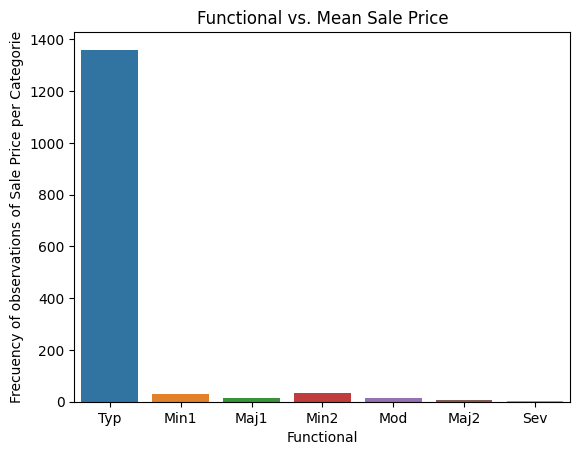

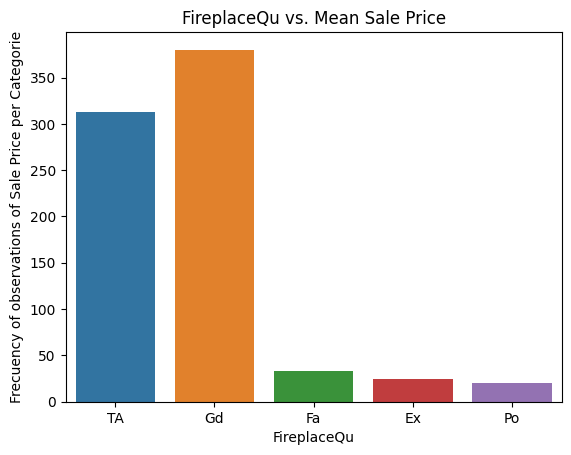

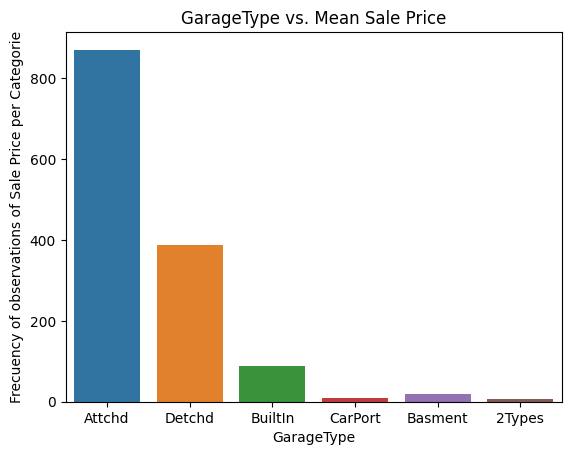

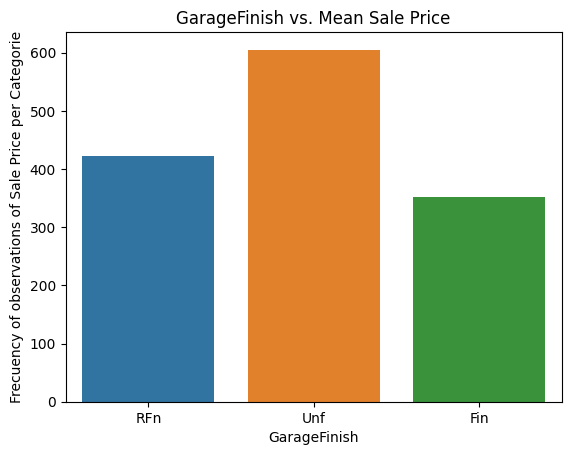

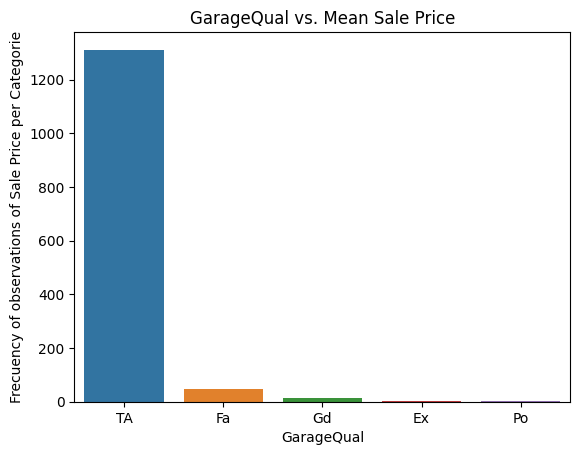

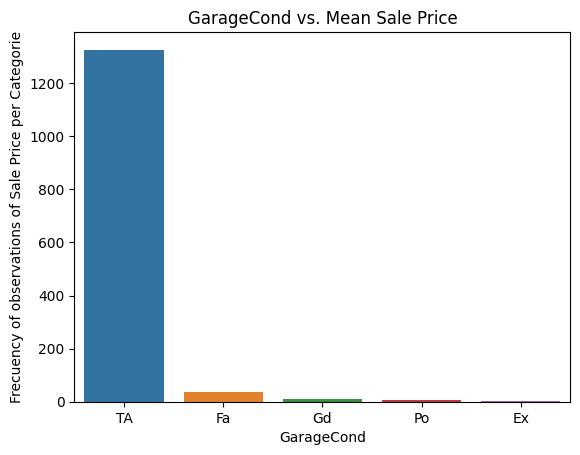

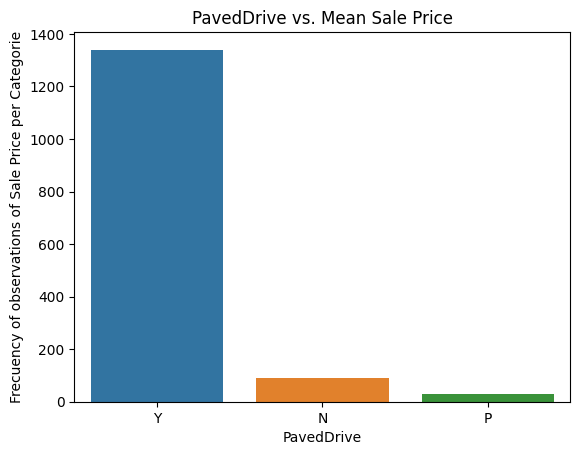

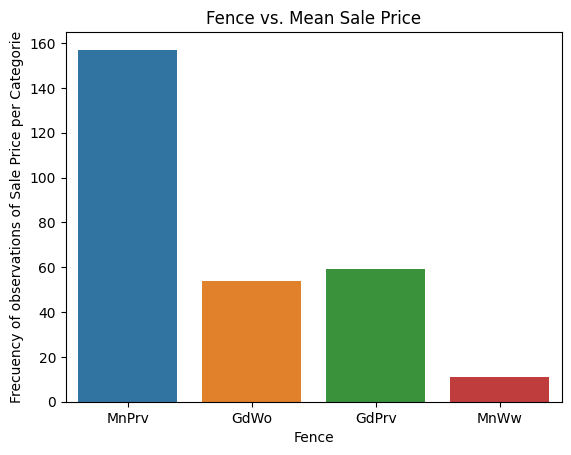

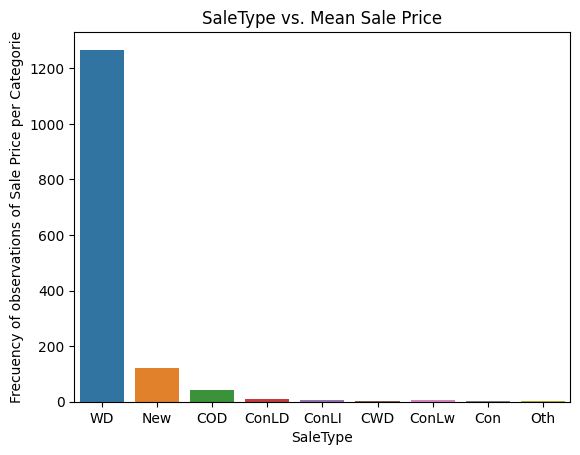

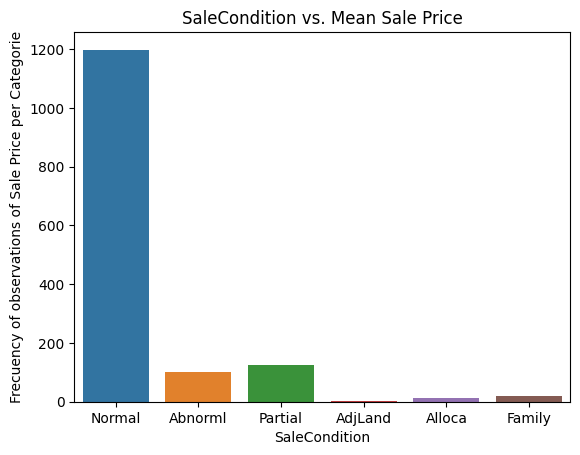

In [ ]:
from scipy.stats import skew

df_filled = df.fillna('Missing')

for i in categoriasImportantes:
    sns.countplot(x=df[i], data=df)
    plt.xlabel(i)
    plt.ylabel('Frecuency of observations of Sale Price per Categorie')
    plt.title(i + " vs. Mean Sale Price")
    plt.show()


Dentro de los bar_plots podemos ver ciertas características que son bastante importantes para predecir el precio ya que son las menos sesgadas, las variables categóricas que tomaremos son: Neighborhood, BsmtFinType1, GarageFinish.  

In [ ]:
dummies = ["Neighborhood", "BsmtFinType1", "GarageFinish"]
dfFiltrado = df[dummies]

Vamos a hacer codificacion ordinal

In [ ]:
dfDummies = pd.get_dummies(dfFiltrado, prefix=["Neighborhood", "BsmtFinType1", "GarageFinish"], drop_first=True)

dfFiltradoNoDummies = dfFiltrado.drop(["Neighborhood", "BsmtFinType1", "GarageFinish"], axis=1)

dfFiltrado = pd.concat([dfFiltradoNoDummies, dfDummies], axis=1)

Veamos un scatter plot de las variables númericas vs la variable objetivo, esto con el objetivo de encontrar variables que tengan correlaciones no lineales para hacer nuestro spline

In [ ]:
num_cols = df._get_numeric_data().columns

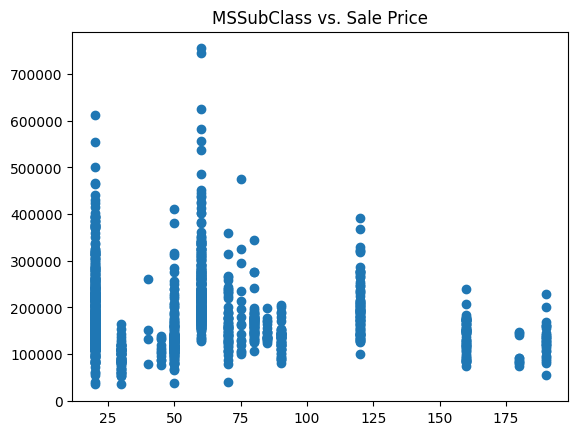

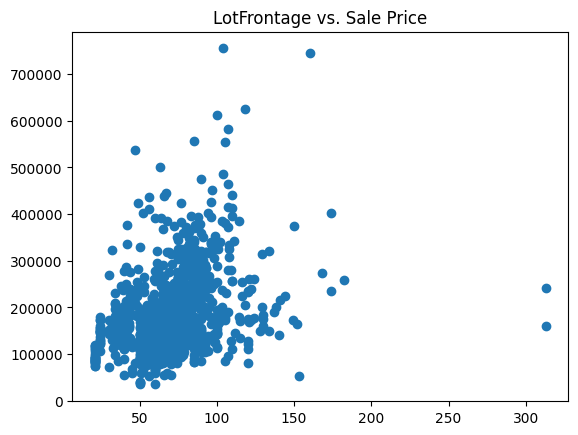

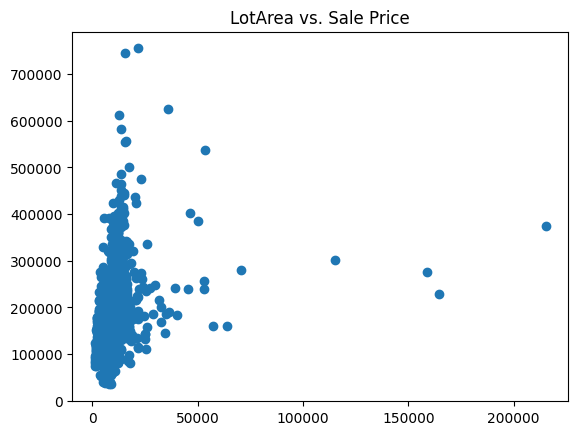

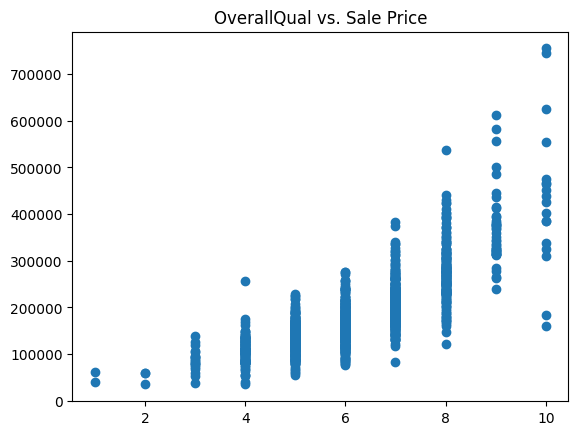

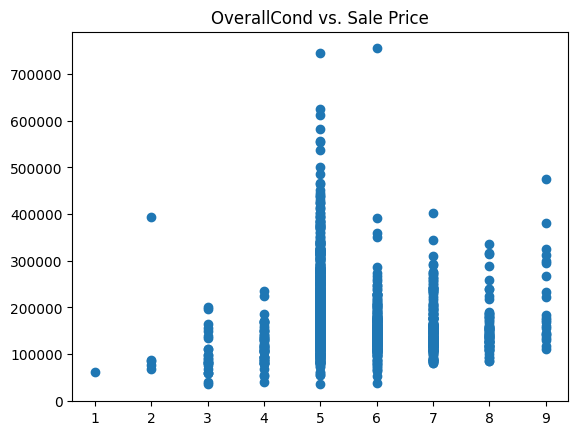

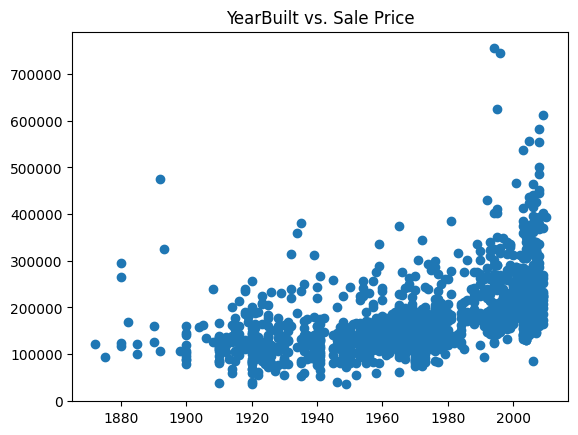

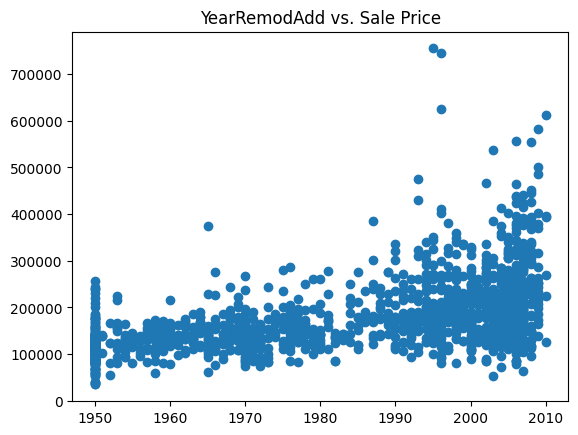

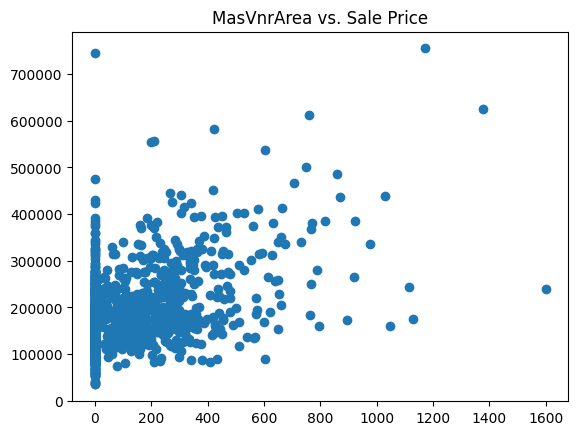

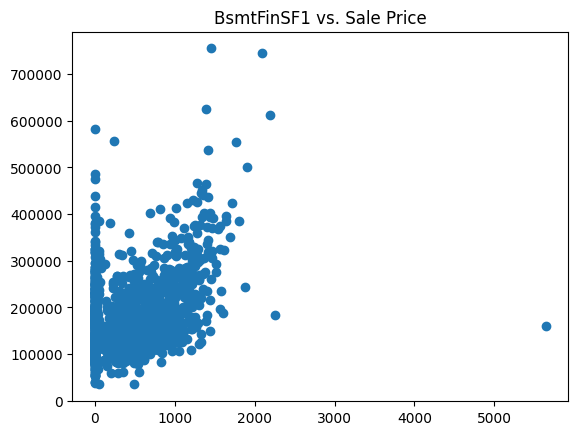

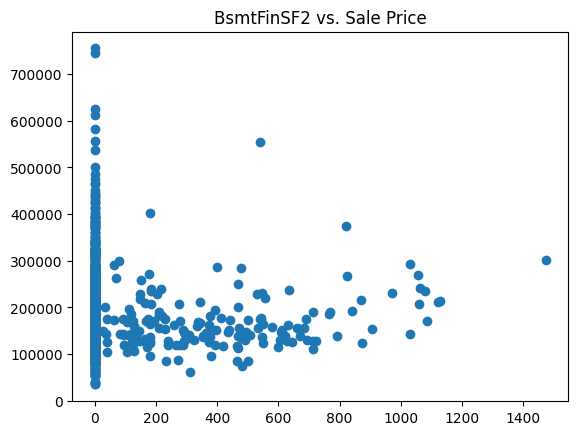

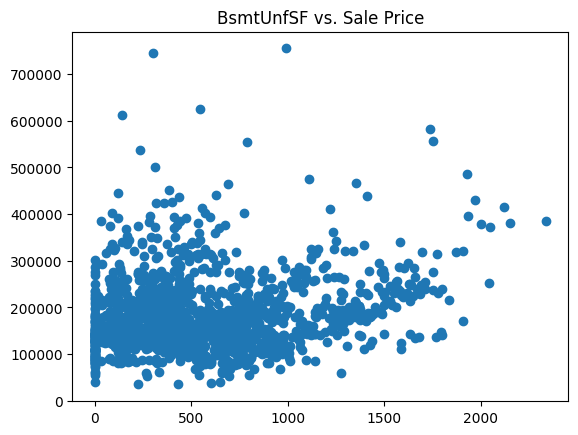

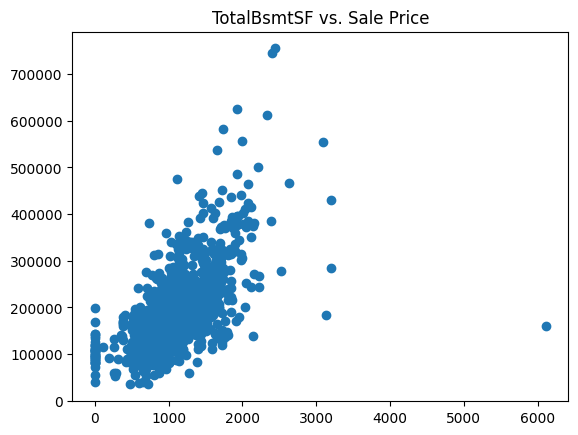

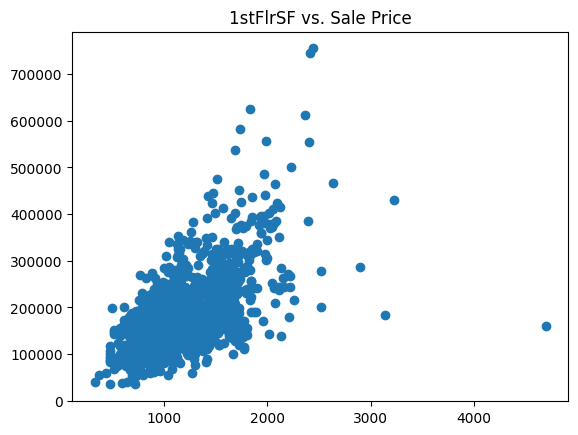

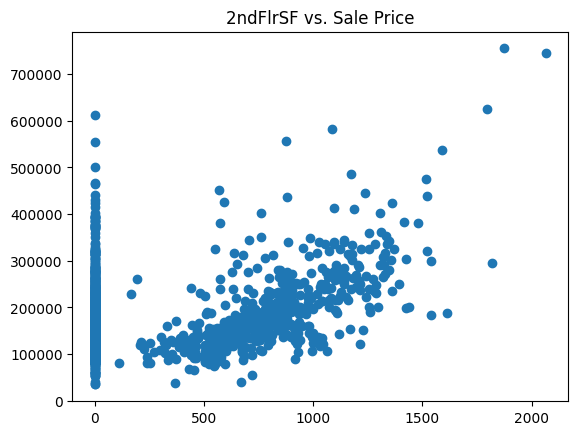

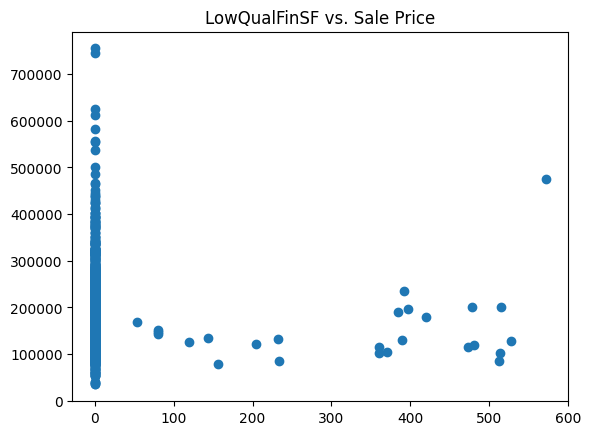

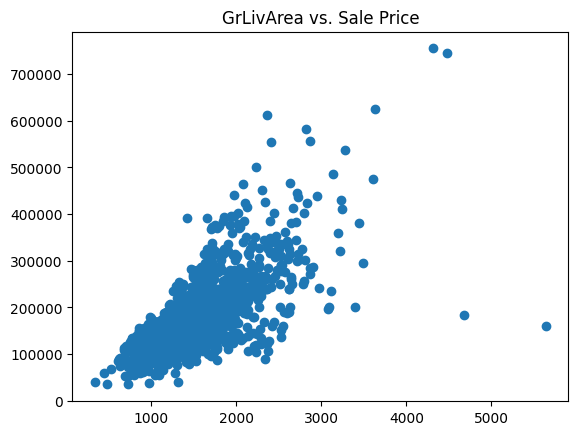

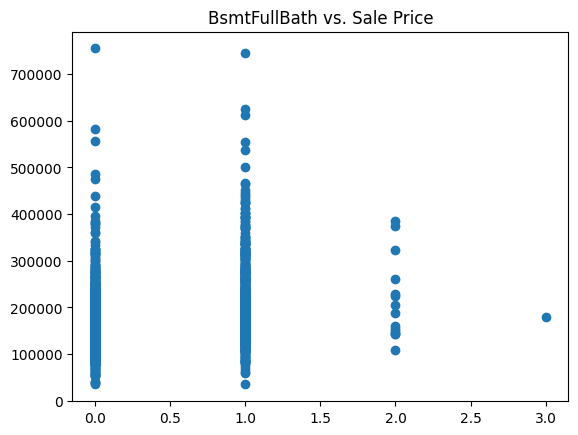

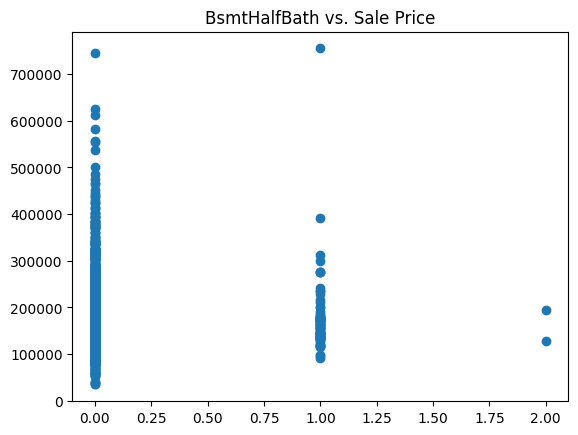

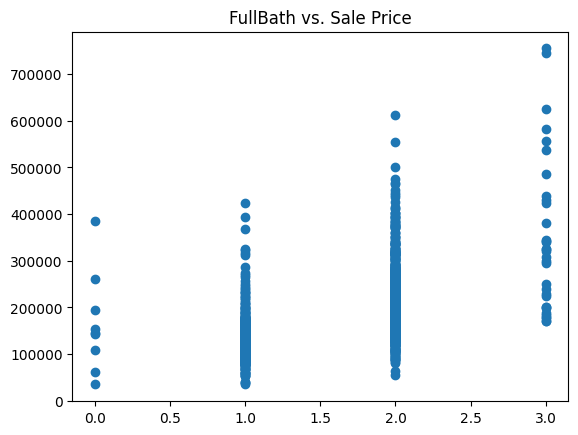

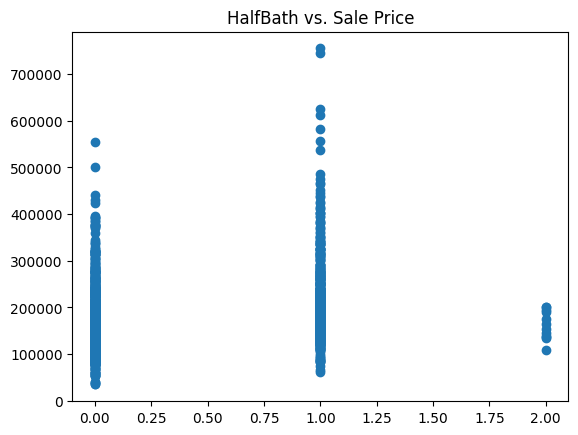

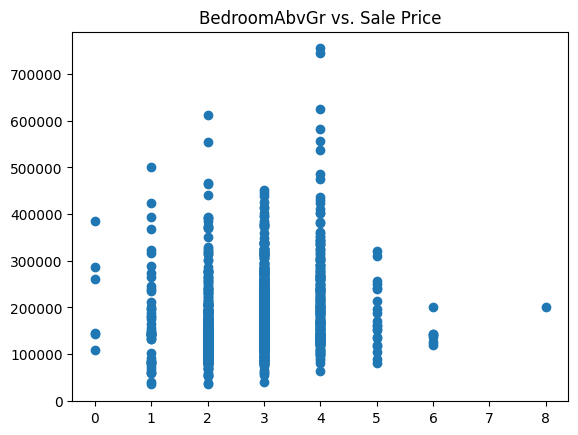

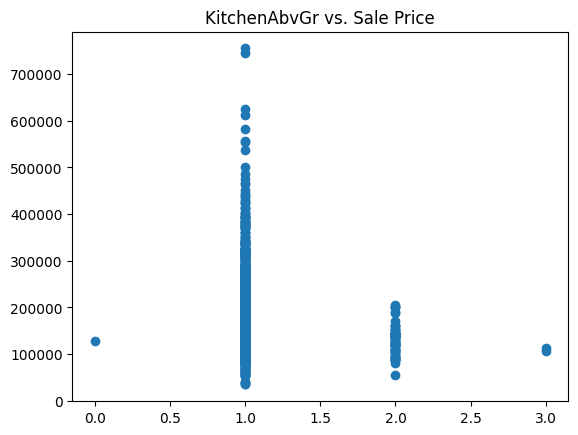

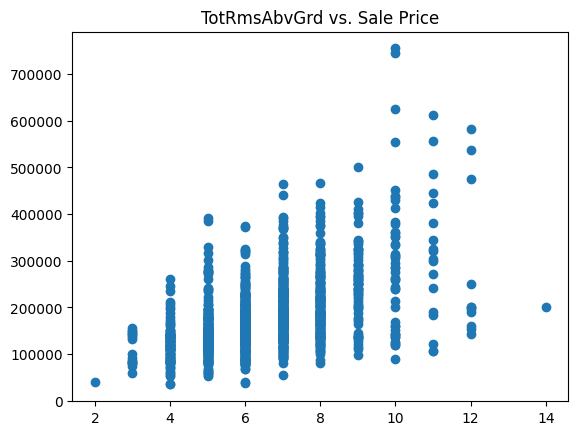

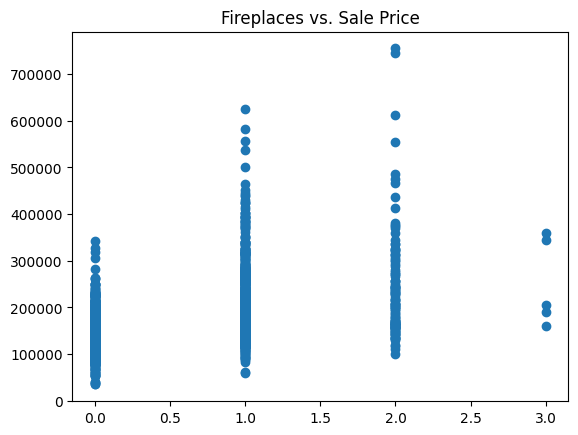

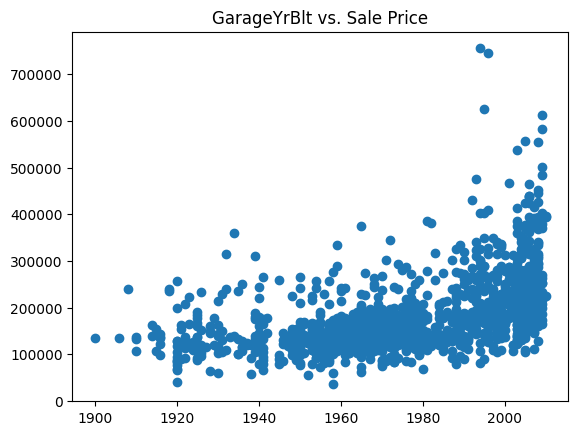

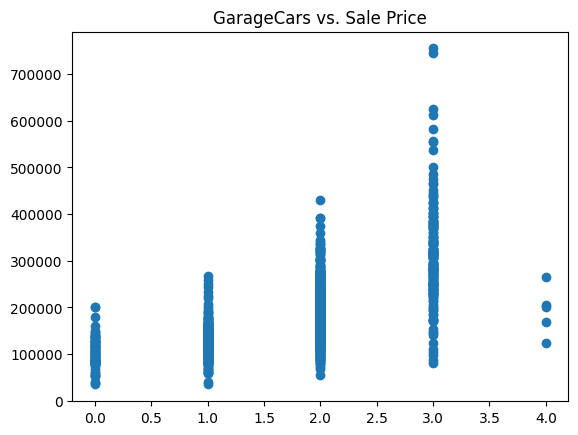

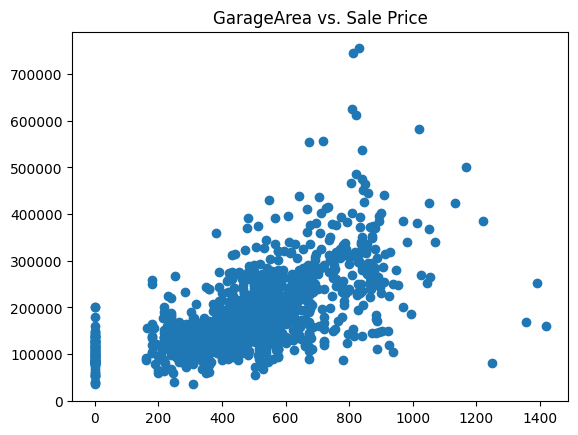

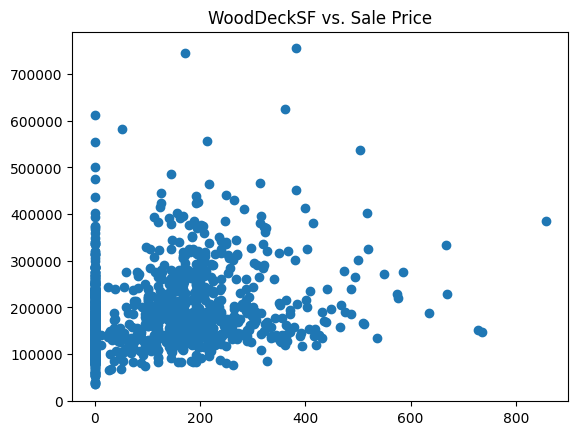

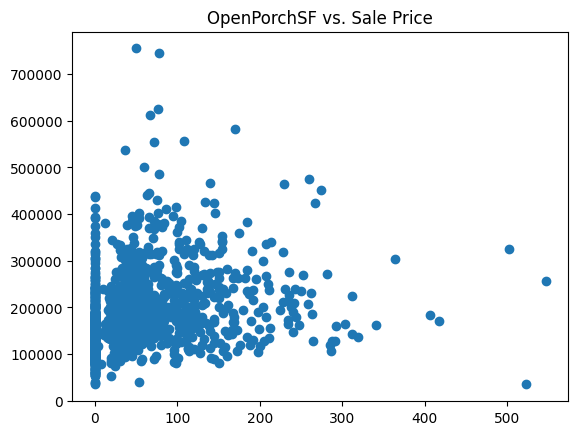

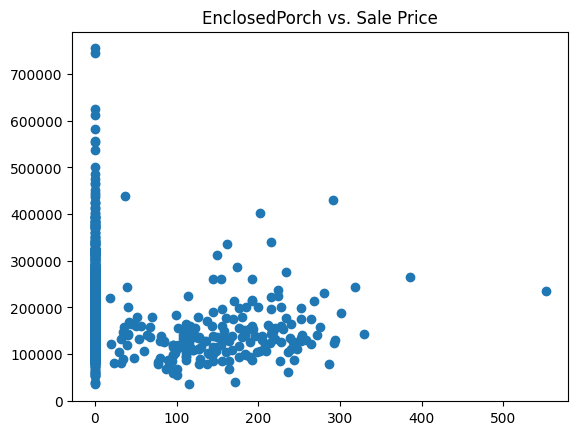

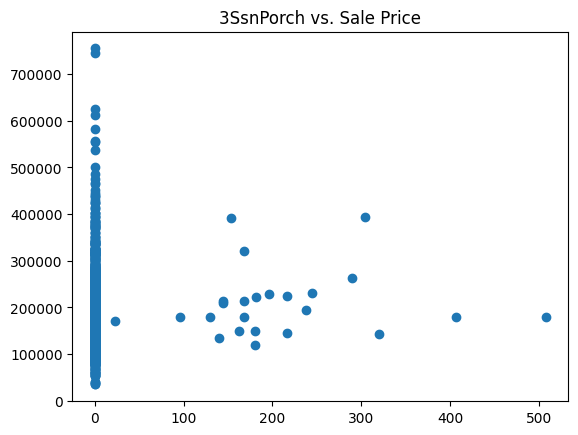

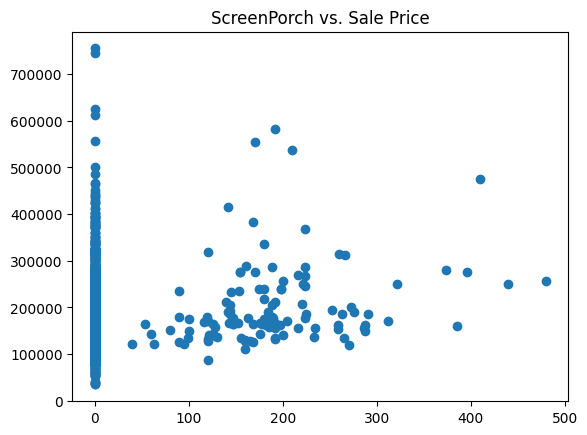

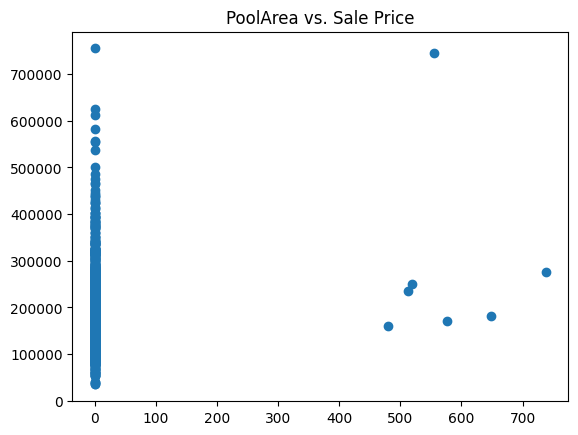

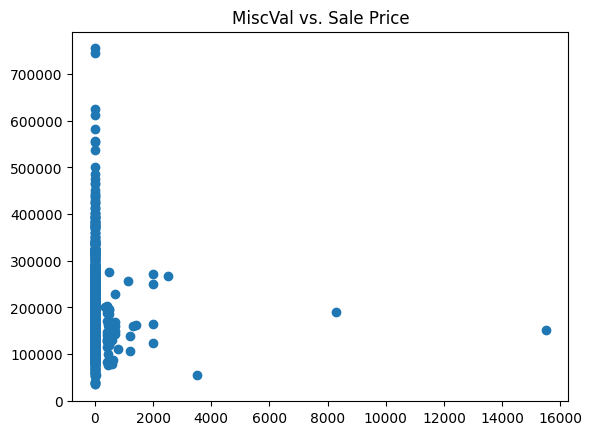

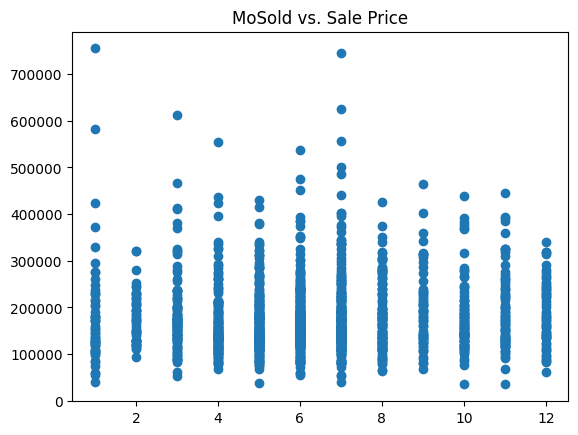

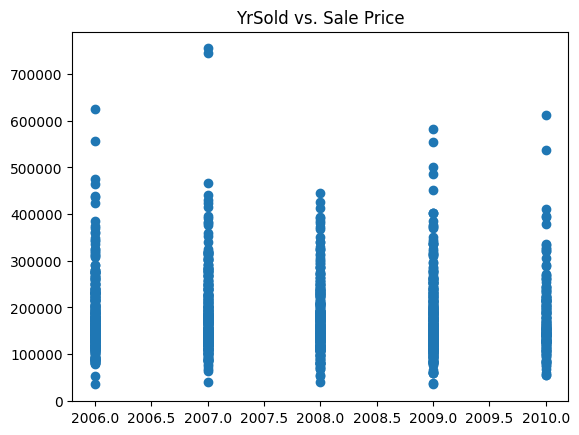

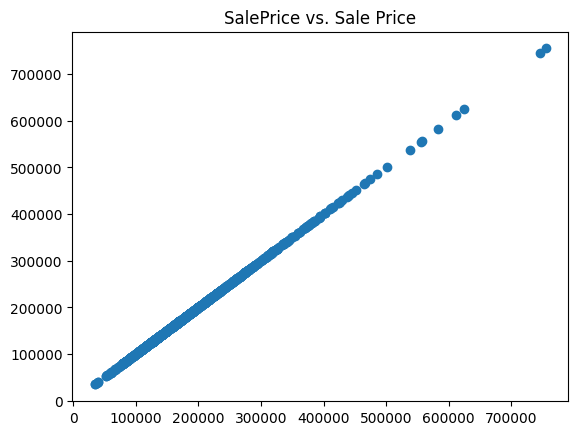

In [ ]:

for i in num_cols:
  plt.scatter(df[i], df['SalePrice'])
  plt.title(i + " vs. Sale Price")
  plt.show()


Podemos ver que la columna BstmUnfSF parece no tener un relación lineal con nuestra variable objetivo, encontremos su coeficiente de correlación de Pearson

In [ ]:
correlation, p_value = stats.pearsonr(df["BsmtUnfSF"], df['SalePrice'])

In [ ]:
print("correlacion", correlation)

correlacion 0.21447910554696886


Hagamos la matriz de correlacion de la variable objetivo con las variables numéricas, luego usaremos las variables que tengan mayor correlación con el precio para el kernel

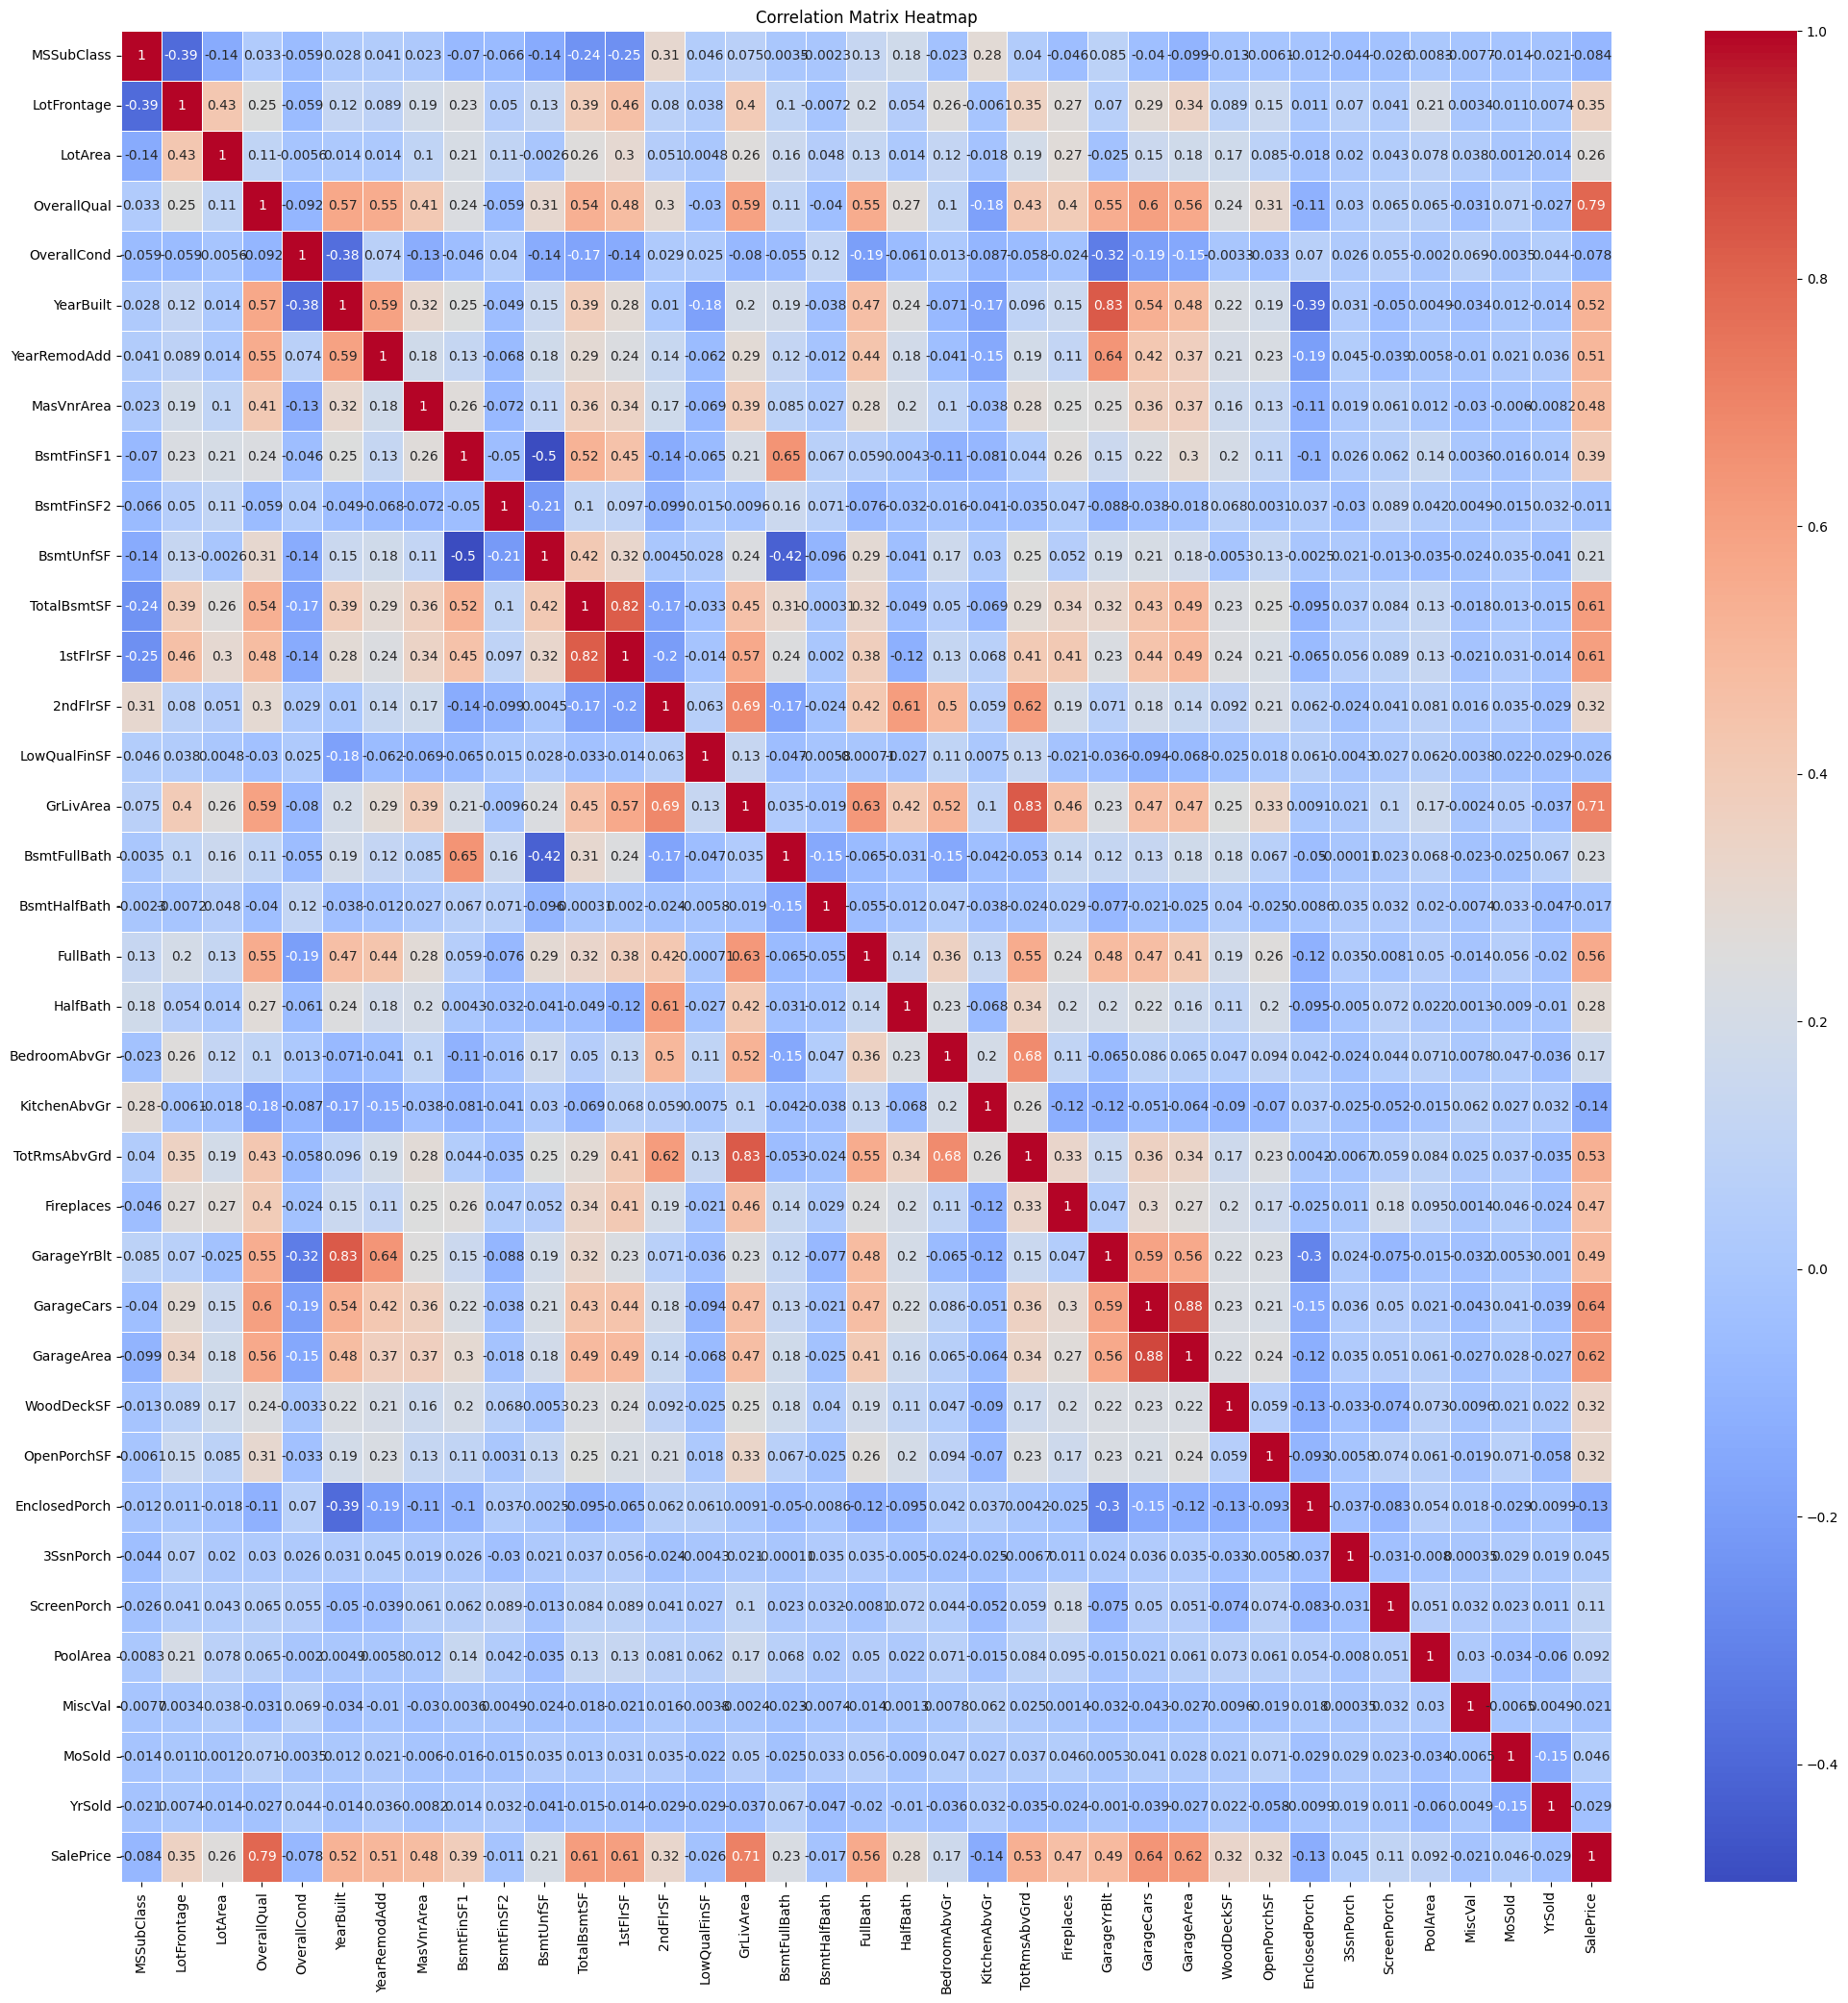

In [ ]:

numericalColumns = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numericalColumns.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Tomaremos las variables con valor absoluto mayor a 0.6

In [ ]:
dfNumeric = df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]


dfNuevo = pd.concat([dfNumeric, dfFiltrado], axis = 1)

Miremos el plot de BsmtUnfSF vs SalePrice

Text(0.5, 1.0, 'BsmtUnfSF vs. Sale Price')

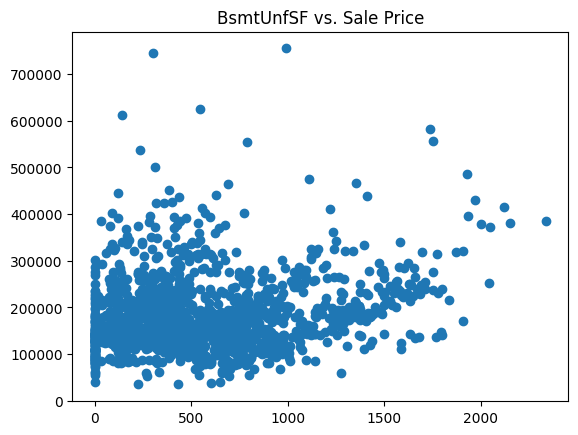

In [ ]:
plt.scatter(df["BsmtUnfSF"], df['SalePrice'])
plt.title("BsmtUnfSF" + " vs. Sale Price")

Se aclara que se van a normalizar los datos para el momento que vayamos a usar kernel mas adelante.

## Punto 2

Utilicemos validación cruzada para encontrar número de nodos y tipo de spline, en este caso tendremos en cuenta la media del error y la varianza del error al hacer validacion cruzada

In [ ]:
dfSpline = df[["SalePrice","BsmtUnfSF"]]

In [ ]:
dfSpline = dfSpline.sort_values(by='BsmtUnfSF', ascending=True)

In [ ]:
valorMinimoX=dfSpline["BsmtUnfSF"].min()
valorMaximoX=dfSpline["BsmtUnfSF"].max()

In [ ]:
def linspace(start, stop, step=1.):
  return np.linspace(start, stop, int((stop - start) / step + 1), endpoint=False)

Vamos a hacer validación cruzada con el objetivo de encontrar un modelo que tenga un RMSE  bajo, comparado a los modelos entrenados con un número diferente de nodos, donde el RMSE no tenga una desviación estándar muy alta, así aseguramos que es el modelo es consistente y predice bien, usaremos splines cúbicos naturales, y splines cúbicos, los nodos de estos están distribuidos de manera uniforme sobre el eje X, se harán pruebas con splines de 3 hasta 50 nodos

In [ ]:
from patsy import dmatrix
natural_spline_mse_es = {}
gradosLibertad = list(range(3, 50))
knots_list = []
valorMinimoX=dfSpline["BsmtUnfSF"].min()
valorMaximoX=dfSpline["BsmtUnfSF"].max()
for i in gradosLibertad:
  paso = (valorMaximoX-valorMinimoX)/i
  knots_list.append(linspace(paso, valorMaximoX, step=paso))


In [ ]:
import numpy as np
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
X = dfSpline["BsmtUnfSF"]
Y = dfSpline["SalePrice"]
splineMse = {}
custom_scoring = make_scorer(mean_squared_error)
for knots in knots_list:
    num_nodes = len(knots) + 2
    X_spline = dmatrix(f"bs(data, knots={list(knots)}, degree=3, include_intercept=False)",
                 {"data": X}, return_type='dataframe')
    regr = LinearRegression()
    cv_scores = cross_val_score(regr, X_spline, Y, cv=10, scoring=custom_scoring)
    splineMse[num_nodes] = [np.mean(cv_scores), np.var(cv_scores)]

In [ ]:
sqrt_dict = {key: [math.sqrt(val[0]), math.sqrt(val[1])] for key, val in splineMse.items()}

In [ ]:
sorted_dict = dict(sorted(sqrt_dict.items(), key=lambda x: x[1][0]))

In [ ]:
sorted_dict

{5: [78707.01255290167, 1892807209.7687201],
 17: [83616.15190402138, 2481821671.2997217],
 16: [92601.91082615699, 4885960948.973931],
 18: [105286.40272705584, 8786076022.58241],
 10: [107365.38068107447, 12576308836.345901],
 14: [116798.54572753051, 17990741118.575203],
 12: [122763.36053311196, 22182239233.497272],
 15: [151716.53604030368, 46896891351.60383],
 20: [157709.74712908344, 48976604995.153366],
 8: [182799.26396373077, 80352456434.68416],
 19: [220661.1408485978, 102516607925.50516],
 6: [266981.4225645427, 196325584569.96063],
 21: [310206.5618923682, 176101769666.67102],
 25: [539415.5730082935, 747156046684.5358],
 27: [1862669.9477443334, 8097952167322.872],
 11: [3564230.3209322398, 38088241344990.47],
 9: [9088679.318319056, 247791217743213.72],
 28: [9161823.393212061, 192479830988142.66],
 26: [9883098.603477852, 290568792364910.8],
 29: [21839574.7789849, 1389829061124396.5],
 24: [23630928.98051077, 1674812149622336.0],
 22: [54613863.88372272, 89477008035203

Obtenemos el mejor RMSE con 5 nodos, este modelo también tiene la varianza del error más baja.

A continuación miremos como se comportan los splines cúbicos naturales para ver si nuestras predicciones mejoran o no

In [ ]:
splineNatural = {}
for dfl in gradosLibertad:

    xNatural = dmatrix(f"cr(data, df={dfl})",
                                     {"data": X.ravel()}, return_type='dataframe')

    # Ajustar el modelo de regresión lineal
    regr = LinearRegression()
    cv_scores = cross_val_score(regr, xNatural, Y, cv=10, scoring=custom_scoring)
    splineNatural[dfl] = [np.mean(cv_scores), np.var(cv_scores)]

In [ ]:
sqrtDictNatural = {key: [math.sqrt(val[0]), math.sqrt(val[1])] for key, val in splineNatural.items()}

In [ ]:
sortedDictNatural = dict(sorted(sqrtDictNatural.items(), key=lambda x: x[1][0]))

In [ ]:
sortedDictNatural

{6: [77546.6132153681, 1247142345.4215076],
 8: [80403.38491767523, 1276102159.8634024],
 3: [81126.39577104882, 1659018416.389948],
 7: [84732.99184201019, 3070403410.5013766],
 5: [85415.5423978687, 4557907079.223963],
 17: [92363.6061767249, 5721478220.509004],
 4: [93204.11006194947, 8294919756.23967],
 9: [291820.3994585421, 235373853610.31836],
 13: [436438.2389459252, 551222971271.1909],
 24: [539953.84271513, 747681366116.5483],
 12: [663975.5211630638, 1299960836376.5603],
 10: [981966.9887149271, 2871655153288.9165],
 11: [1151534.8934726524, 3955756493588.669],
 14: [459554705.1370801, 6.335715618276507e+17],
 21: [1399387903546758.0, 5.87485951377897e+30],
 15: [9744408931339276.0, 2.8486051626349394e+32],
 37: [1.588521872054383e+16, 5.4039487904788295e+32],
 45: [1.6232720695600228e+16, 7.133154225142063e+32],
 26: [1.9011668240417664e+16, 1.0843305878511173e+33],
 31: [2.349869335964607e+16, 1.6565657688320225e+33],
 20: [2.8606681651127876e+16, 2.4550267052669288e+33],


El spline natural con 6 nodos tiene menor varianza en el error y un menor RMSE, por lo que nos vamos a quedar con el

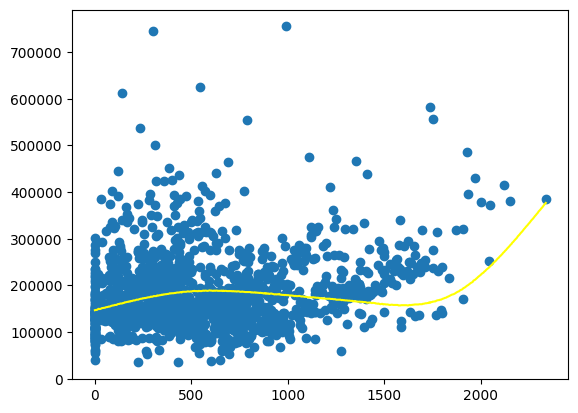

In [ ]:
xNatural = dmatrix(f"cr(data, df={6})",
                                     {"data": X.ravel()}, return_type='dataframe')
xPlot = np.linspace(valorMinimoX, valorMaximoX, 500).reshape(-1, 1)
regr = LinearRegression()
regr.fit(xNatural, Y)
xNaturalPlot = dmatrix(f"cr(data, df={6})",
                                     {"data": xPlot.ravel()}, return_type='dataframe')
yPlot = regr.predict(xNaturalPlot)
plt.scatter(dfSpline["BsmtUnfSF"], dfSpline['SalePrice'])
plt.plot(xPlot, yPlot, label="Grado 6", color= "yellow")


## Punto 3

Se procede a normalizar los datos para ejecutar suavizado kernel.

A continuación vamos a hacer validación cruzada con los parámetros alpha, para prevenir overfitting, kernel y gamma que es usada para el kernel gausiano y nos indica que tanta influencia tendrán los puntos dependiendo de que tan alejados estén, entre más bajo el valor de gamma más influencia tendrán puntos lejanos, vamos a ver que pasa si hacemos nuestra predicción usando solo con las variables continuas que encontramos en el análisis exploratorio de los datos vs si usamos estos valores más las variables dummies

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dfSplineX = dfNuevo

scaler = MinMaxScaler()

dfSplineXNorm = scaler.fit_transform(dfSplineX)


In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1.0],
}
model = KernelRidge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(dfSplineX, dfSpline['SalePrice'])
best_model = grid_search.best_estimator_


In [ ]:
best_mse = -grid_search.best_score_
print("Best Squared Mean Squared Error:", math.sqrt(best_mse))

Best Squared Mean Squared Error: 82912.72593530462


In [ ]:
best_model

KernelRidge(alpha=0.1, gamma=0.01)

## Punto 4

Pudimos evidenciar que en nuestro modelo optimo de splines su error tuvo un valor de 77546.6132153681 mientras que en el caso del kernel su valor fue de 82912.72593530462. Esto deja en evidencia que al menos para este caso y con los paramtros establecidos con las explicaciones ya dadas, que la efectivdad de ambos metodos no esta muy alejada una de la otra aunque los splines funcionen ligeramente mejor que el suavizado kernel.

Tambien tener en cuenta que el proceso para hallar los parametros optimos del kernel fue mucho mas demorado que los de los splines.